In [1]:
import sys
sys.version

'3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

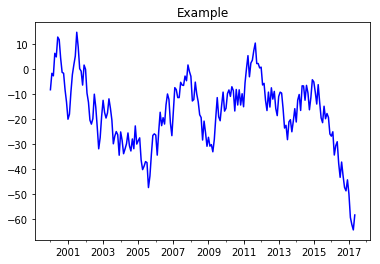

2000-01-31    -8.260624
2000-02-29    -1.673873
2000-03-31    -2.683213
2000-04-30     6.335694
2000-05-31     4.904528
2000-06-30    12.857505
2000-07-31    11.817475
2000-08-31     4.326070
2000-09-30    -1.309381
2000-10-31    -1.632187
2000-11-30    -8.245277
2000-12-31   -13.188635
2001-01-31   -20.068097
2001-02-28   -18.054126
2001-03-31    -9.253150
2001-04-30    -2.218621
2001-05-31     1.687346
2001-06-30     5.214967
2001-07-31    14.782863
2001-08-31     8.817036
2001-09-30     0.176372
2001-10-31    -0.811500
2001-11-30    -6.394700
2001-12-31     1.632835
2002-01-31    -0.054998
2002-02-28    -9.617955
2002-03-31   -13.261070
2002-04-30   -20.430986
2002-05-31   -22.037832
2002-06-30   -19.852068
                ...    
2014-12-31    -4.247860
2015-01-31    -5.113108
2015-02-28    -9.205877
2015-03-31   -13.989922
2015-04-30    -6.216037
2015-05-31   -13.290783
2015-06-30   -19.541271
2015-07-31   -21.453912
2015-08-31   -14.861888
2015-09-30   -19.869952
2015-10-31   -17

In [3]:
random.seed(111)
rng = pd.date_range(start='2000', periods=209, freq='M')
ts = pd.Series(np.random.uniform(-10, 10, size=len(rng)), rng).cumsum()
ts.plot(c='b', title='Example')
plt.show()
ts

In [4]:
TS = np.array(ts)
num_periods = 20
f_horizon = 1
x_data = TS[:(len(TS) - (len(TS) % num_periods))]
x_batches = x_data.reshape(-1, 20, 1)

y_data = TS[1:(len(TS) - (len(TS) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1, 20, 1)

In [5]:
def test_data(series, forecast, num_periods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 20, 1)
    testY = TS[-(num_periods):].reshape(-1, 20, 1)
    return testX, testY

X_test, Y_test = test_data(TS, f_horizon, num_periods)

array([[[ -8.26062384],
        [ -1.67387305],
        [ -2.68321311],
        [  6.3356945 ],
        [  4.90452825],
        [ 12.85750516],
        [ 11.8174746 ],
        [  4.32607007],
        [ -1.30938117],
        [ -1.6321873 ],
        [ -8.24527695],
        [-13.1886354 ],
        [-20.06809737],
        [-18.05412586],
        [ -9.25314978],
        [ -2.21862087],
        [  1.68734641],
        [  5.21496725],
        [ 14.78286326],
        [  8.81703586]],

       [[  0.17637166],
        [ -0.8114995 ],
        [ -6.39469987],
        [  1.63283487],
        [ -0.05499815],
        [ -9.61795502],
        [-13.26107023],
        [-20.43098599],
        [-22.03783246],
        [-19.85206849],
        [-10.03784061],
        [-15.27095076],
        [-23.24159714],
        [-31.92867272],
        [-27.4475664 ],
        [-18.8863512 ],
        [-12.50062019],
        [-17.29339938],
        [-19.59331833],
        [-17.56138301]],

       [[-11.8992758 ],
        [-15

In [6]:
tf.reset_default_graph()

num_periods = 20
inputs = 1
hidden = 100
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
Y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [7]:
epochs = 10000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict = {X: x_batches, Y: y_batches})
        if ep % 500 == 0:
            mse = loss.eval(feed_dict = {X: x_batches, Y: y_batches})
            print (ep, '\tMSE: ', mse)
    y_pred = sess.run(outputs, feed_dict = {X: X_test})
    print(y_pred)

0 	MSE:  56622.6
500 	MSE:  617.751
1000 	MSE:  317.69
1500 	MSE:  236.674
2000 	MSE:  198.448
2500 	MSE:  173.498
3000 	MSE:  158.558
3500 	MSE:  151.292
4000 	MSE:  138.152
4500 	MSE:  129.974
5000 	MSE:  128.212
5500 	MSE:  120.119
6000 	MSE:  114.826
6500 	MSE:  115.729
7000 	MSE:  109.792
7500 	MSE:  107.269
8000 	MSE:  111.169
8500 	MSE:  103.962
9000 	MSE:  101.703
9500 	MSE:  99.5461
[[[-17.58135986]
  [-20.9058342 ]
  [ -5.26917791]
  [-42.6689682 ]
  [-30.47892189]
  [-21.37988663]
  [-40.68636703]
  [-20.03354836]
  [-25.5121212 ]
  [-38.91255569]
  [-51.06211472]
  [-31.50195694]
  [-55.69115067]
  [-48.18174744]
  [-55.20106506]
  [-44.01491165]
  [-49.88978195]
  [-63.06684494]
  [-68.98253632]
  [-52.70845795]]]


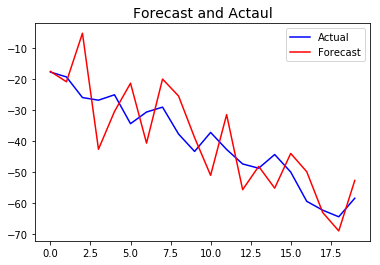

In [8]:
plt.title('Forecast and Actaul', fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), 'b', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_pred)), 'r', markersize=10, label='Forecast')
plt.legend()
plt.show()